In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_siap = pd.read_csv('../dataset/dataset_bersih.csv')
data_siap

,text
0,keren sangat mudah lihat pulsa tau kuota
1,mantap
2,bismillah baik
3,terima kasih telkomsel hari gue promo kuota gb...
4,mantap
...,...
4591,sangat bantu
4592,mantap
4593,baik
4594,baik mohon lebih banyak promo potong harga


In [5]:
def hitung_skor_sentiment(kalimat, positif, negatif):
    list_kata = kalimat.split()
    cocok_positif = 0
    cocok_negatif = 0
    
    #Mencari kata positif
    for kata in list_kata:
        if any(item.lower() == kata.lower() for item in positif):
            cocok_positif += 1
    
    #Mencari kata negatif
    for kata in list_kata:
        if any(item.lower() == kata.lower() for item in negatif):
            cocok_negatif += 1
    
    score = cocok_positif - cocok_negatif
    
    return score

In [6]:
with open('../dictonary/list-of-positive-words.txt') as f:
    lines_pos = f.readlines()
list_positif = [x.replace('\n', '') for x in lines_pos]

with open('../dictonary/list-of-negative-words.txt') as f:
    lines_neg = f.readlines()
list_negatif = [x.replace('\n', '') for x in lines_neg]

In [7]:
scores = []

for kalimat in data_siap['text']:
    scores.append(hitung_skor_sentiment(kalimat, list_positif, list_negatif))
scores

[2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 -1,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 3,
 2,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 5,
 -1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 -3,
 0,
 1,
 0,
 1,
 -8,
 0,
 1,
 1,
 -1,
 1,
 0,
 1,
 1,
 1,
 3,
 0,
 1,
 1,
 1,
 1,
 1,
 -2,
 1,
 0,
 1,
 1,
 0,
 4,
 2,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 3,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 3,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 4,
 1,
 1,
 3,
 1,
 -1,
 1,
 1,
 1,
 0,
 1,
 1,
 -2,
 1,
 0,
 2,
 0,
 0,
 1,
 1,
 -1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 3,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 -1,
 2,
 1,
 0,
 1,
 -1,
 0,
 0,
 -2,
 -1,
 1,
 1,
 0

# Membuat dataframe dengan score

In [10]:
data = {
    'text' : data_siap['text'],
    'score' : scores
}
df = pd.DataFrame(data)
df

,text,score
0,keren sangat mudah lihat pulsa tau kuota,2
1,mantap,1
2,bismillah baik,2
3,terima kasih telkomsel hari gue promo kuota gb...,2
4,mantap,1
...,...,...
4591,sangat bantu,1
4592,mantap,1
4593,baik,1
4594,baik mohon lebih banyak promo potong harga,2


# Konversi score untuk lebeling

In [11]:
label = []

for score in df['score']:
    if score < 0 :
        label.append('negatif')
    else:
        label.append('positif')

In [12]:
data = {
    'text' : data_siap['text'],
    'score' : scores,
    'label' : label
}
df = pd.DataFrame(data)
df

,text,score,label
0,keren sangat mudah lihat pulsa tau kuota,2,positif
1,mantap,1,positif
2,bismillah baik,2,positif
3,terima kasih telkomsel hari gue promo kuota gb...,2,positif
4,mantap,1,positif
...,...,...,...
4591,sangat bantu,1,positif
4592,mantap,1,positif
4593,baik,1,positif
4594,baik mohon lebih banyak promo potong harga,2,positif


# Plot Label data dengan positif dan negatif

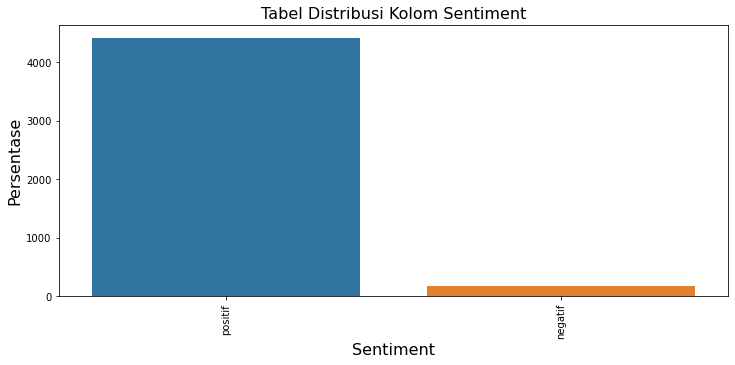

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x='label', data=df)
plt.title('Tabel Distribusi Kolom Sentiment', fontsize=16)
plt.ylabel('Persentase', fontsize=16)
plt.xlabel('Sentiment', fontsize=16)
plt.xticks(rotation='vertical');

In [11]:
dataset_positif = df[df['label'] == 'positif']  

In [12]:
dataset_negatif = df[df['label'] == 'negatif']  

In [13]:
dataset_positif.to_csv("../dataset/dataset_positif.csv", index=None)

In [14]:
dataset_negatif.to_csv("../dataset/dataset_negatif.csv", index=None)

In [15]:
df.to_csv("../dataset/dataset_jadi.csv", index=None)